In [1]:
from __future__ import division
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pylab
from matplotlib.text import Annotation
from sympy.vector import *
from sympy import *

init_printing()

# I still need to import all the stuff above
import sdg 



In [2]:
help(sdg.space_surface)

Help on function space_surface in module sdg:

space_surface(ax, f, x, y, X, Y, rs, cs)
    # plots a surface given 
    # ax is the Matplotlib plot.axis()
    # f is a function of x and y defining a surface such that z=f(x,y)
    # x,y are symbols in f
    # X,Y are a numpy meshgrid
    # rs = rstride (row stride) for the matplotlib function ax.plot_surface
    # cs = cstride (column stride) for the matplotlib function ax.plot_surface



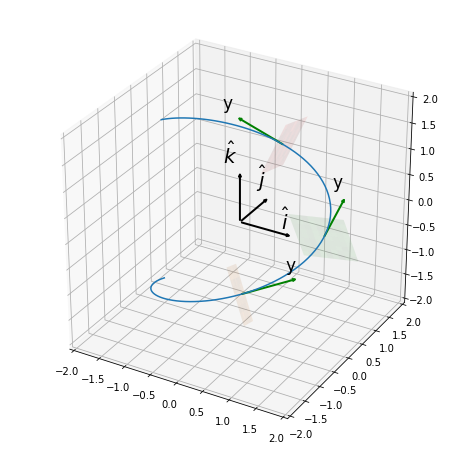

In [4]:
# create a coordinate system
e = CoordSys3D('e')
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
# create the numpy linspace
theta = np.linspace(-np.pi, np.pi, 100)
# create some variables
theta_2,theta_3 = symbols('theta_2,theta_3')

# create a sympy vector function for the space curve
r = 1.5*cos(theta_2)*e.i + 1.5*sin(theta_2)*e.j + theta_2/2*e.k
r2 = r.subs({theta_2:theta_3})

# setup the view
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

# plot the curve
sdg.space_curve(ax,e, r, theta_2, theta)

# plot the cartesian basis
sdg.PlotBasisCartesian(ax)

# compute the tangent
tangent = sdg.unit_tangent_time(r2,theta_3)

theta_val =-np.pi/3

# plot the tangent and tangent line at theta_3 = theta_val
p = r2.subs({theta_3:theta_val})
tang =tangent.subs({theta_3:theta_val})
tangent_line = tang * 5
sdg.plot_plane_from_point_normal(ax, e, p, tang)
sdg.plot_arrow(ax,p, tang, e, "y",'g')

theta_val =np.pi/32

# plot the tangent and tangent line at theta_3 = theta_val
p = r2.subs({theta_3:theta_val})
tang =tangent.subs({theta_3:theta_val})
tangent_line = tang * 5
sdg.plot_plane_from_point_normal(ax, e, p, tang)
sdg.plot_arrow(ax,p, tang, e, "y",'g')

theta_val =np.pi/2

# plot the tangent at theta_3 = theta_val
p = r2.subs({theta_3:theta_val})
tang =tangent.subs({theta_3:theta_val})
tangent_line = tang * 5
sdg.plot_plane_from_point_normal(ax, e, p, tang)
sdg.plot_arrow(ax,p, tang, e, "y",'g')


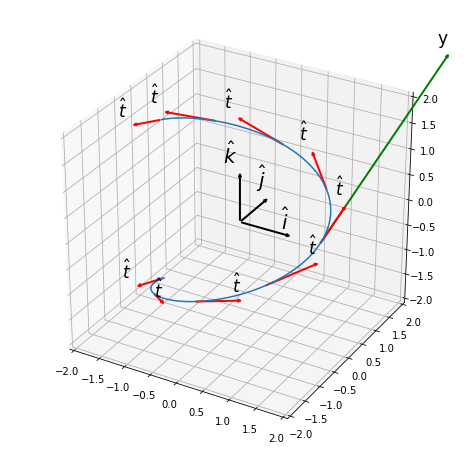

In [5]:

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
theta = np.linspace(-np.pi, np.pi, 100)
theta_2 = symbols('theta_2')
r = 1.5*cos(theta_2)*e.i + 1.5*sin(theta_2)*e.j + theta_2/2*e.k
sdg.space_curve(ax,e, r, theta_2, theta)

sdg.PlotBasisCartesian(ax)

# compute the tangent
tangent = sdg.unit_tangent_time(r,theta_2)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

tangent_line = tangent * 5
sdg.plot_arrow(ax,r.subs({theta_2:0}), tangent_line.subs({theta_2:0}), e, "y",'g')

for i in range(0,9):
    sdg.plot_arrow(ax,r.subs({theta_2:i*2*pi/8-pi}), tangent.subs({theta_2:i*2*pi/8-pi}), e, r'$\hat{t}$','r')
    

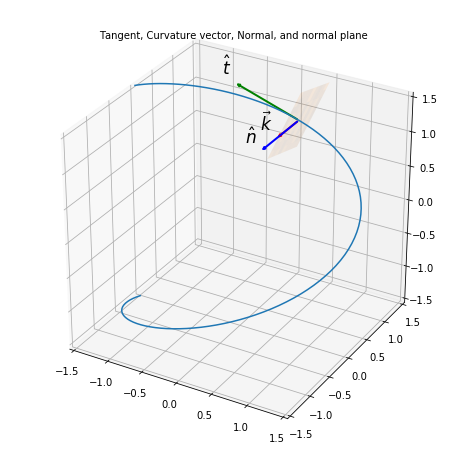

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

# create some symbols
theta_2,theta_3 = symbols('theta_2,theta_3')

# create a sympy vector function
r = 1.5*cos(theta_2)*e.i + 1.5*sin(theta_2)*e.j + theta_2/2*e.k
r2 = r.subs({theta_2:theta_3}) # copy of our vector

# create a numpy linspace
theta = np.linspace(-np.pi, np.pi, 100)

# plot the curve
sdg.space_curve(ax,e, r, theta_2, theta)


# compute the tangent curvature vector and normal
tangent = sdg.unit_tangent_time(r2,theta_3)
curv_vec = sdg.curv_vec_time(r2,theta_3)
normal = curv_vec / curv_vec.magnitude() 

# compute the value of the tangent,curvature vector and normal 
# at the point 
p = r2.subs({theta_3:np.pi/2})
tang =tangent.subs({theta_3:np.pi/2})
kurv = curv_vec.subs({theta_3:np.pi/2})
norm = normal.subs({theta_3:np.pi/2})

# plot the plane 
sdg.plot_plane_from_point_normal(ax,e,p,tang )

# set up the view
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

tangent_line = tang * 5
sdg.plot_arrow(ax,p, tang, e, r"$\hat{t}$",'g')
sdg.plot_arrow(ax,p,kurv,  e, r"$\vec{k}$",'r')
sdg.plot_arrow(ax,p,norm,  e, r"$\hat{n}$",'b')
ax.set_title('Tangent, Curvature vector, Normal, and normal plane', fontsize=10)

the curvature equation


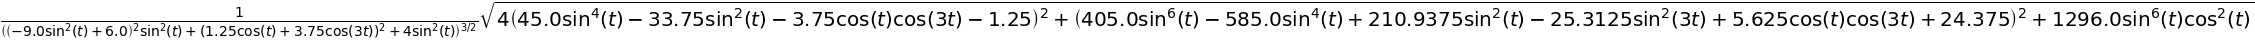

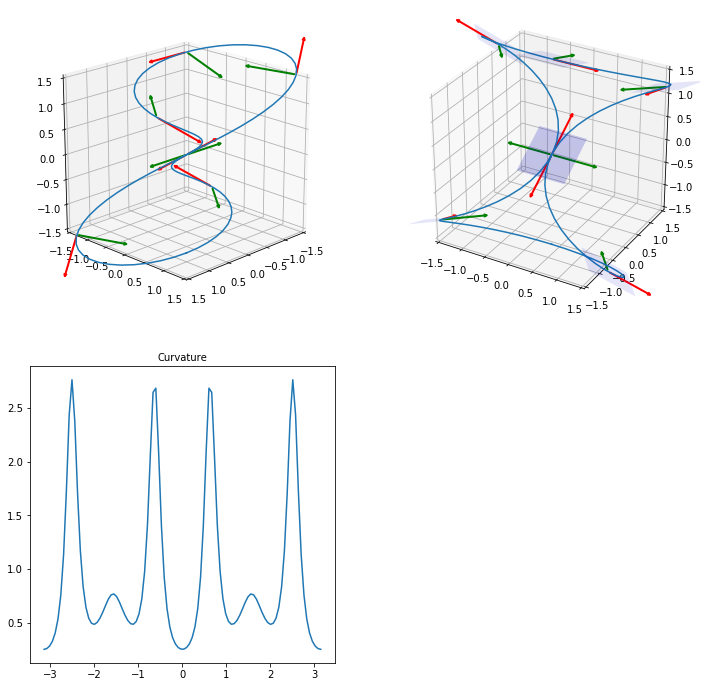

In [8]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2, 2, 1, projection='3d')

# create some symbols
theta_3,t = symbols('theta_3,t')

# create a sympy vector function for the curve
r = 2.5*cos(t)*sin(2*t)*e.i + 1.5*sin(t)*sin(2*t)*e.j + 2*cos(t)*e.k

# create a numpy linspace
tt = np.linspace(-np.pi, np.pi, 100)

# plot the curve
sdg.space_curve(ax,e, r, t, tt)    


# compute the tangent and normal
tangent = sdg.unit_tangent_time(r,t)
curv_vec = sdg.curv_vec_time(r,t)
normal = curv_vec / curv_vec.magnitude() 

# setup the view
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.view_init(20, 45)

# plot the tangent and normal vectors at various points on the curve
for c in range(2,16,2):
    sdg.plot_arrow(ax,r.subs({t:c*2*np.pi/16-np.pi}), tangent.subs({t:c*2*np.pi/16-np.pi}), e, '','r')
    sdg.plot_arrow(ax,r.subs({t:c*2*np.pi/16-np.pi}), normal.subs({t:c*2*np.pi/16-np.pi}), e, '','g')
    
# add another subplot
ax = fig.add_subplot(2, 2, 2, projection='3d')
# plot the curva again
sdg.space_curve(ax, e,r, t, tt)

# meshgrid
X = np.linspace(-0.5,0.5,10)
Y = np.linspace(-0.5,0.5,10)
X,Y = np.meshgrid(X,Y)

for c in range(2,16,2):
    r1 = r.subs({t:c*2*np.pi/16-np.pi})
    tn1 = tangent.subs({t:c*2*np.pi/16-np.pi})
    nm1 = normal.subs({t:c*2*np.pi/16-np.pi})
    sdg.plot_arrow(ax,r1,tn1, e, '','r')
    sdg.plot_arrow(ax,r1,nm1, e, '','g')
    # plot the plane
    sdg.plot_plane(ax,e,r1,tn1,nm1,X,Y)

# setup the view
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)    

# plot the curvature
ax = fig.add_subplot(2, 2, 3)
kappa = lambdify(t, sdg.curvature_time(r,t), "numpy")
ax.plot(tt,kappa(tt))
ax.set_title('Curvature', fontsize=10)

print "the curvature equation"
simplify(sdg.curvature_time(r,t))

the curvature equation


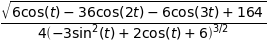

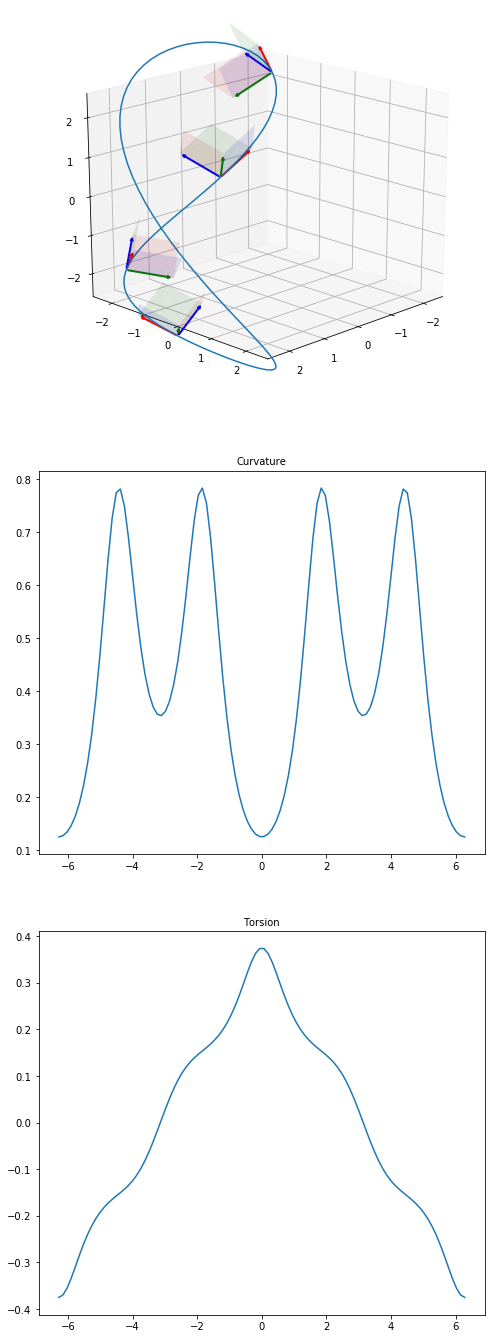

In [11]:
# create appropriate figure size
fig = plt.figure(figsize=(8, 24))
# make a axis with a set of subplots
ax = fig.add_subplot(3, 1, 1, projection='3d')
# create symbols
t = symbols('t')
# create a sympy vector equation for the curve
r = (2+cos(t))*e.i + 2*sin(t)*e.j + 4*sin(t/2)*e.k
# create a numpy linspace for the plotrange
tt = np.linspace(-2*np.pi, 2*np.pi, 100)
# plot the curve
sdg.space_curve(ax, e, r, t, tt)    
#PlotBasisCartesian()

# compute the tangent
tangent = sdg.unit_tangent_time(r,t) # unit tangent
curv_vec = sdg.curv_vec_time(r,t) # curvature vector
normal = curv_vec / curv_vec.magnitude() # normal vector
binormal = tangent.cross(normal) # binormal vector

# set the axis limits
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)

# set the viewing angle
ax.view_init(20, 45)

# this time the meshgrid goes from 0 to 1
X = np.linspace(0,1,10)
Y = np.linspace(0,1,10)
X,Y = np.meshgrid(X,Y)

for c in range(2,16,4):
    time_point = c*2*np.pi/16-np.pi
    
    sdg.plot_arrow(ax,r.subs({t:time_point}), tangent.subs({t:time_point}), e, '','r')
    sdg.plot_arrow(ax,r.subs({t:time_point}), normal.subs({t:time_point}), e, '','g')
    sdg.plot_arrow(ax,r.subs({t:time_point}), binormal.subs({t:time_point}), e, '','b')
    
    r1 = r.subs({t:time_point})
    tn1 = tangent.subs({t:time_point})
    nm1 = normal.subs({t:time_point})
    bn1 = binormal.subs({t:time_point})
    
    sdg.plot_plane(ax,e,r1,tn1,nm1,X,Y,'b',0.1)
    sdg.plot_plane(ax,e,r1,tn1,bn1,X,Y,'g',0.1)
    sdg.plot_plane(ax,e,r1,bn1,nm1,X,Y,'r',0.1)

# plot the curvature over the range    
ax = fig.add_subplot(3, 1, 2)
kappa = lambdify(t, sdg.curvature_time(r,t), "numpy")
ax.plot(tt,kappa(tt))
ax.set_title('Curvature', fontsize=10)

# plot the torsion over the range
ax = fig.add_subplot(3, 1, 3)
tau = lambdify(t, sdg.torsion_time(r,t), "numpy")
ax.plot(tt,tau(tt))
ax.set_title('Torsion', fontsize=10)

print "the curvature equation"
simplify(sdg.curvature_time(r,t))

In [12]:
y_1,y_2,y_3 = symbols("y_1,y_2,y_3")
Y = Matrix([y_1,y_2,y_3])
r=sdg.rect_vector_of_sphere_coords(e, Y)

In [13]:
r

In [14]:
#https://stackoverflow.com/questions/139180/how-to-list-all-functions-in-a-python-module
import ast
import sys

def top_level_functions(body):
    return (f for f in body if isinstance(f, ast.FunctionDef))

def parse_ast(filename):
    with open(filename, "rt") as file:
        return ast.parse(file.read(), filename=filename)
    
def print_funcs(filename):
    print(filename)
    tree = parse_ast(filename)
    for func in top_level_functions(tree.body):
        print("  %s" % func.name)
        
print_funcs("C:\Users\dave\Anaconda2\Lib\site-packages\sdg.py")

C:\Users\dave\Anaconda2\Lib\site-packages\sdg.py
  annotate3D
  PlotBasisCartesian
  plot_arrow
  plot_basis
  unit_tangent_natural
  unit_tangent_time
  tangent_line_natural
  tangent_line_natural_at_point
  tangent_line_time
  tangent_line_time_at_point
  space_curve
  curv_vec_natural
  curv_vec_from_tangent
  curvature_natural
  curv_mag
  rad_of_curv_natural
  rad_of_curv_from_curv_vec
  curv_vec_time
  normal_vec_time
  principle_normal_natural
  principle_normal_from_curv_vec
  principle_normal_from_tangent
  curvature_time
  normal_plane_natural
  normal_plane_time
  osculating_plane_natural
  plot_plane
  plot_plane_from_point_normal
  binormal_natural
  binormal_natural_from_tangent
  binormal_from_tangent_normal
  binormal_line
  binormal_line_at_point
  torsion_natural
  torsion_time
  torsion_from_tangent_normal
  torsion_from_normal_binormal
  dbds_natural
  torsion_from_dbds_normal
  plot_frenet_frame
  plot_frenet_frame_2
  monge_patch_z
  space_surface
  computePeaks
 

In [15]:
help(sdg.vector_to_matrix_form)

Help on function vector_to_matrix_form in module sdg:

vector_to_matrix_form(e, v)
    # converts a vector v in basis e into a matrix
    # e is the CoordSys3D
    # v is the vector



In [16]:
r = sdg.vector_to_matrix_form(e,r)

In [17]:
r

⎡y₁⋅sin(y₂)⋅cos(y₃)⎤
⎢                  ⎥
⎢y₁⋅sin(y₂)⋅sin(y₃)⎥
⎢                  ⎥
⎣    y₁⋅cos(y₂)    ⎦

In [18]:
r.jacobian(Y)

⎡sin(y₂)⋅cos(y₃)  y₁⋅cos(y₂)⋅cos(y₃)  -y₁⋅sin(y₂)⋅sin(y₃)⎤
⎢                                                        ⎥
⎢sin(y₂)⋅sin(y₃)  y₁⋅sin(y₃)⋅cos(y₂)  y₁⋅sin(y₂)⋅cos(y₃) ⎥
⎢                                                        ⎥
⎣    cos(y₂)         -y₁⋅sin(y₂)               0         ⎦

In [19]:
g = simplify(sdg.metric_from_coords(r,Y))

In [20]:
g

⎡1   0        0      ⎤
⎢                    ⎥
⎢     2              ⎥
⎢0  y₁        0      ⎥
⎢                    ⎥
⎢          2    2    ⎥
⎣0   0   y₁ ⋅sin (y₂)⎦

In [21]:
help(sdg.compute_christoffel_symbols_2)

Help on function compute_christoffel_symbols_2 in module sdg:

compute_christoffel_symbols_2(metric, d, basis, metric_inv)
    # this was added because the original christoffel symbol code
    # above does not extend to higher dimensions, neither does
    # the inner function christoffel_symbol_2 (see above)
    # and so
    # metric is the metric d*d
    # d is the dimension of the space
    # basis is the basis from which the metric was derived [x_1, ... x_d]
    # metric_inv is the optional inverse of the metric



In [22]:
Gamma=sdg.compute_christoffel_symbols_2(g, 3, Y,g.inverse())

In [23]:
Gamma

⎡                        ⎡    1              ⎤  ⎡               1    ⎤⎤
⎢                        ⎢0   ──       0     ⎥  ⎢0      0       ──   ⎥⎥
⎢⎡0   0        0      ⎤  ⎢    y₁             ⎥  ⎢               y₁   ⎥⎥
⎢⎢                    ⎥  ⎢                   ⎥  ⎢                    ⎥⎥
⎢⎢0  -y₁       0      ⎥  ⎢1                  ⎥  ⎢                1   ⎥⎥
⎢⎢                    ⎥, ⎢──  0        0     ⎥, ⎢0      0     ───────⎥⎥
⎢⎢               2    ⎥  ⎢y₁                 ⎥  ⎢             tan(y₂)⎥⎥
⎢⎣0   0   -y₁⋅sin (y₂)⎦  ⎢                   ⎥  ⎢                    ⎥⎥
⎢                        ⎢        -sin(2⋅y₂) ⎥  ⎢1      1            ⎥⎥
⎢                        ⎢0   0   ───────────⎥  ⎢──  ───────     0   ⎥⎥
⎣                        ⎣             2     ⎦  ⎣y₁  tan(y₂)         ⎦⎦

In [24]:
Gamma2 = Matrix([[Gamma[0]],[Gamma[1]],[Gamma[2]]])
Gamma2



⎡⎡0   0        0      ⎤⎤
⎢⎢                    ⎥⎥
⎢⎢0  -y₁       0      ⎥⎥
⎢⎢                    ⎥⎥
⎢⎢               2    ⎥⎥
⎢⎣0   0   -y₁⋅sin (y₂)⎦⎥
⎢                      ⎥
⎢⎡    1              ⎤ ⎥
⎢⎢0   ──       0     ⎥ ⎥
⎢⎢    y₁             ⎥ ⎥
⎢⎢                   ⎥ ⎥
⎢⎢1                  ⎥ ⎥
⎢⎢──  0        0     ⎥ ⎥
⎢⎢y₁                 ⎥ ⎥
⎢⎢                   ⎥ ⎥
⎢⎢        -sin(2⋅y₂) ⎥ ⎥
⎢⎢0   0   ───────────⎥ ⎥
⎢⎣             2     ⎦ ⎥
⎢                      ⎥
⎢⎡               1    ⎤⎥
⎢⎢0      0       ──   ⎥⎥
⎢⎢               y₁   ⎥⎥
⎢⎢                    ⎥⎥
⎢⎢                1   ⎥⎥
⎢⎢0      0     ───────⎥⎥
⎢⎢             tan(y₂)⎥⎥
⎢⎢                    ⎥⎥
⎢⎢1      1            ⎥⎥
⎢⎢──  ───────     0   ⎥⎥
⎣⎣y₁  tan(y₂)         ⎦⎦

In [25]:
help(sdg.Riemann_Tensor_2)

Help on function Riemann_Tensor_2 in module sdg:

Riemann_Tensor_2(gamma_2, X, d)
    ## returns the Riemann tensor with 1 contravariant index (the first) and 
    ## 3 covariant indices, accessed with R[a,b,c,d]
    ## gamma_2 is the set of christoffel symbols for the metric_
    ## X is the coord system X= [X_1,... X_d]  
    ## d is the number of dimensions of the metric e.g 4



In [26]:
sdg.Riemann_Tensor_2(Gamma2, Y, 3)

⎡⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎣⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎦

In [27]:
t =symbols("t")
y_1 = Function("y_1")
y_2 = Function("y_2")
y_3 = Function("y_3")
Y = Matrix([y_1(t),y_2(t),y_3(t)])
r=sdg.rect_vector_of_sphere_coords(e, Y)
r

In [28]:
r = sdg.vector_to_matrix_form(e,r)
r

⎡y₁(t)⋅sin(y₂(t))⋅cos(y₃(t))⎤
⎢                           ⎥
⎢y₁(t)⋅sin(y₂(t))⋅sin(y₃(t))⎥
⎢                           ⎥
⎣     y₁(t)⋅cos(y₂(t))      ⎦

In [29]:
r.jacobian(Y)

⎡sin(y₂(t))⋅cos(y₃(t))  y₁(t)⋅cos(y₂(t))⋅cos(y₃(t))  -y₁(t)⋅sin(y₂(t))⋅sin(y₃(
⎢                                                                             
⎢sin(y₂(t))⋅sin(y₃(t))  y₁(t)⋅sin(y₃(t))⋅cos(y₂(t))  y₁(t)⋅sin(y₂(t))⋅cos(y₃(t
⎢                                                                             
⎣     cos(y₂(t))             -y₁(t)⋅sin(y₂(t))                    0           

t))⎤
   ⎥
)) ⎥
   ⎥
   ⎦

In [30]:
g = simplify(sdg.metric_from_coords(r,Y))
g

⎡1    0             0         ⎤
⎢                             ⎥
⎢     2                       ⎥
⎢0  y₁ (t)          0         ⎥
⎢                             ⎥
⎢             2       2       ⎥
⎣0    0     y₁ (t)⋅sin (y₂(t))⎦

In [31]:
Gamma=sdg.compute_christoffel_symbols_2(g, 3, Y,g.inverse())

In [32]:
Y = Matrix([y_1(t),y_2(t),y_3(t)])
DY = diff(Y,t)
sdg.covariant_derivative_contravariant_vector(DY, Y, Gamma, 3)


⎡                  d                    2        d        ⎤
⎢    0      -y₁(t)⋅──(y₂(t))  -y₁(t)⋅sin (y₂(t))⋅──(y₃(t))⎥
⎢                  dt                            dt       ⎥
⎢                                                         ⎥
⎢d             d                              d           ⎥
⎢──(y₂(t))     ──(y₁(t))        -sin(2⋅y₂(t))⋅──(y₃(t))   ⎥
⎢dt            dt                             dt          ⎥
⎢─────────     ─────────        ────────────────────────  ⎥
⎢  y₁(t)         y₁(t)                     2              ⎥
⎢                                                         ⎥
⎢d             d                 d            d           ⎥
⎢──(y₃(t))     ──(y₃(t))         ──(y₂(t))    ──(y₁(t))   ⎥
⎢dt            dt                dt           dt          ⎥
⎢─────────     ──────────        ────────── + ─────────   ⎥
⎣  y₁(t)       tan(y₂(t))        tan(y₂(t))     y₁(t)     ⎦

In [33]:
# with T as our first time derivative DY
sdg.absolute_derivative(DY, Y, DY,t, Gamma, 3 )

⎡                               2                    2     2       ⎤
⎢           2        ⎛d        ⎞          ⎛d        ⎞     d        ⎥
⎢- y₁(t)⋅sin (y₂(t))⋅⎜──(y₃(t))⎟  - y₁(t)⋅⎜──(y₂(t))⎟  + ───(y₁(t))⎥
⎢                    ⎝dt       ⎠          ⎝dt       ⎠      2       ⎥
⎢                                                        dt        ⎥
⎢                                                                  ⎥
⎢                           2                                      ⎥
⎢                ⎛d        ⎞                   d         d         ⎥
⎢   sin(2⋅y₂(t))⋅⎜──(y₃(t))⎟      2          2⋅──(y₁(t))⋅──(y₂(t)) ⎥
⎢                ⎝dt       ⎠     d             dt        dt        ⎥
⎢ - ───────────────────────── + ───(y₂(t)) + ───────────────────── ⎥
⎢               2                 2                  y₁(t)         ⎥
⎢                               dt                                 ⎥
⎢                                                                  ⎥
⎢                   d         d   

In [34]:

D2Y = diff(DY,t)
Abs_accel=sdg.absolute_acceleration(DY, D2Y, Gamma, 3 )
Abs_accel

⎡                               2                    2     2       ⎤
⎢           2        ⎛d        ⎞          ⎛d        ⎞     d        ⎥
⎢- y₁(t)⋅sin (y₂(t))⋅⎜──(y₃(t))⎟  - y₁(t)⋅⎜──(y₂(t))⎟  + ───(y₁(t))⎥
⎢                    ⎝dt       ⎠          ⎝dt       ⎠      2       ⎥
⎢                                                        dt        ⎥
⎢                                                                  ⎥
⎢                           2                                      ⎥
⎢                ⎛d        ⎞                   d         d         ⎥
⎢   sin(2⋅y₂(t))⋅⎜──(y₃(t))⎟      2          2⋅──(y₁(t))⋅──(y₂(t)) ⎥
⎢                ⎝dt       ⎠     d             dt        dt        ⎥
⎢ - ───────────────────────── + ───(y₂(t)) + ───────────────────── ⎥
⎢               2                 2                  y₁(t)         ⎥
⎢                               dt                                 ⎥
⎢                                                                  ⎥
⎢                   d         d   

In [35]:
# This simplifies as before

accel_corrected=sdg.physical_acceleration_from_absolute_acceleration(Abs_accel,g,3)
accel_corrected

⎡                                              2                    2     2   
⎢                          2        ⎛d        ⎞          ⎛d        ⎞     d    
⎢               - y₁(t)⋅sin (y₂(t))⋅⎜──(y₃(t))⎟  - y₁(t)⋅⎜──(y₂(t))⎟  + ───(y₁
⎢                                   ⎝dt       ⎠          ⎝dt       ⎠      2   
⎢                                                                       dt    
⎢                                                                             
⎢    ⎛⎛                          2       2       ⎞                            
⎢    ⎜⎜               ⎛d        ⎞       d        ⎟           d         d      
⎢    ⎜⎜- sin(2⋅y₂(t))⋅⎜──(y₃(t))⎟  + 2⋅───(y₂(t))⎟⋅y₁(t) + 4⋅──(y₁(t))⋅──(y₂(t
⎢    ⎜⎜               ⎝dt       ⎠        2       ⎟           dt        dt     
⎢    ⎝⎝                                dt        ⎠                            
⎢    ─────────────────────────────────────────────────────────────────────────
⎢                                            2⋅y₁(t)

In [36]:
rho,theta,phi = symbols("rho,theta,phi")
expand_trig(expand(accel_corrected)).subs({tan(y_2(t)):sin(y_2(t))/cos(y_2(t)),y_1(t):rho,y_2(t):theta,y_3(t):phi})

⎡                                            2            2     2             
⎢                                2    ⎛d    ⎞      ⎛d    ⎞     d              
⎢                         - ρ⋅sin (θ)⋅⎜──(φ)⎟  - ρ⋅⎜──(θ)⎟  + ───(ρ)          
⎢                                     ⎝dt   ⎠      ⎝dt   ⎠      2             
⎢                                                             dt              
⎢                                                                             
⎢                                                                   ____      
⎢                                                                  ╱  2  d    
⎢               ____                      2      ____   2      2⋅╲╱  ρ  ⋅──(ρ)
⎢              ╱  2                ⎛d    ⎞      ╱  2   d                 dt   
⎢          - ╲╱  ρ  ⋅sin(θ)⋅cos(θ)⋅⎜──(φ)⎟  + ╲╱  ρ  ⋅───(θ) + ───────────────
⎢                                  ⎝dt   ⎠              2                ρ    
⎢                                                   

In [37]:
sdg.Riemann_Tensor_2(Gamma, Y, 3)

⎡⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎣⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎦

In [38]:

r

⎡y₁(t)⋅sin(y₂(t))⋅cos(y₃(t))⎤
⎢                           ⎥
⎢y₁(t)⋅sin(y₂(t))⋅sin(y₃(t))⎥
⎢                           ⎥
⎣     y₁(t)⋅cos(y₂(t))      ⎦

In [39]:
y_0 = Function("y_0")
r2 = Matrix([I*y_0(t),-r[0],-r[1],-r[2]])
r2

⎡          ⅈ⋅y₀(t)           ⎤
⎢                            ⎥
⎢-y₁(t)⋅sin(y₂(t))⋅cos(y₃(t))⎥
⎢                            ⎥
⎢-y₁(t)⋅sin(y₂(t))⋅sin(y₃(t))⎥
⎢                            ⎥
⎣     -y₁(t)⋅cos(y₂(t))      ⎦

In [40]:
tau = symbols("tau")
Y=Matrix([y_0(t), y_1(t),y_2(t),y_3(t)])
scJ = r2.jacobian(Y)
scJ

⎡ⅈ            0                          0                             0      
⎢                                                                             
⎢0  -sin(y₂(t))⋅cos(y₃(t))  -y₁(t)⋅cos(y₂(t))⋅cos(y₃(t))  y₁(t)⋅sin(y₂(t))⋅sin
⎢                                                                             
⎢0  -sin(y₂(t))⋅sin(y₃(t))  -y₁(t)⋅sin(y₃(t))⋅cos(y₂(t))  -y₁(t)⋅sin(y₂(t))⋅co
⎢                                                                             
⎣0       -cos(y₂(t))              y₁(t)⋅sin(y₂(t))                     0      

        ⎤
        ⎥
(y₃(t)) ⎥
        ⎥
s(y₃(t))⎥
        ⎥
        ⎦

In [41]:
simplify(scJ.T*scJ)

⎡-1  0    0             0         ⎤
⎢                                 ⎥
⎢0   1    0             0         ⎥
⎢                                 ⎥
⎢         2                       ⎥
⎢0   0  y₁ (t)          0         ⎥
⎢                                 ⎥
⎢                 2       2       ⎥
⎣0   0    0     y₁ (t)⋅sin (y₂(t))⎦

In [42]:
r,r_s,c = symbols("r,r_s,c")
A_r = sqrt(1-r_s/r)*c
B_r = sqrt((1-r_s/r)**(-1))
Y = Matrix([y_1(t),y_2(t),y_3(t)])
G,M = symbols("G,M")
f_1 = sqrt(1-r_s/y_1(t))#.subs({r_s:2*G*M/(c**2)})
f_2 = 1/f_1
f_1
x=sdg.rect_vector_of_sphere_coords(e, Y)
x = sdg.vector_to_matrix_form(e,x)

Y=Matrix([y_0(t), y_1(t),y_2(t),y_3(t)])

In [43]:

a = symbols("a")
Swc3 = simplify(scJ.T*scJ)
#Swc3[0,0]*=(1-r_s/r)
Swc4 = Matrix([[Swc3[0,0]*(1-r_s/r),0,0,0],[0,Swc3[1,1]/(1-r_s/r),0,0],[0,0,Swc3[2,2],0],[0,0,0,Swc3[3,3]]])

In [44]:
Gs = (-1)*Swc4.subs({r:y_1(t)})
Gs

⎡   r_s                                                ⎤
⎢- ───── + 1       0          0              0         ⎥
⎢  y₁(t)                                               ⎥
⎢                                                      ⎥
⎢                 -1                                   ⎥
⎢     0       ───────────     0              0         ⎥
⎢                r_s                                   ⎥
⎢             - ───── + 1                              ⎥
⎢               y₁(t)                                  ⎥
⎢                                                      ⎥
⎢                             2                        ⎥
⎢     0            0       -y₁ (t)           0         ⎥
⎢                                                      ⎥
⎢                                      2       2       ⎥
⎣     0            0          0     -y₁ (t)⋅sin (y₂(t))⎦

In [45]:
Gamma=sdg.compute_christoffel_symbols_2(Gs, 4, Y,Gs.inverse_GE())
Gamma

⎡                                                      ⎡-r_s⋅(r_s - y₁(t))    
⎢⎡                               -r_s               ⎤  ⎢───────────────────   
⎢⎢          0            ─────────────────────  0  0⎥  ⎢          3           
⎢⎢                       2⋅(r_s - y₁(t))⋅y₁(t)      ⎥  ⎢      2⋅y₁ (t)        
⎢⎢                                                  ⎥  ⎢                      
⎢⎢        -r_s                                      ⎥  ⎢                      
⎢⎢─────────────────────            0            0  0⎥, ⎢         0           ─
⎢⎢2⋅(r_s - y₁(t))⋅y₁(t)                             ⎥  ⎢                     2
⎢⎢                                                  ⎥  ⎢                      
⎢⎢          0                      0            0  0⎥  ⎢         0            
⎢⎢                                                  ⎥  ⎢                      
⎢⎣          0                      0            0  0⎦  ⎢                      
⎣                                                   

In [46]:
Y

⎡y₀(t)⎤
⎢     ⎥
⎢y₁(t)⎥
⎢     ⎥
⎢y₂(t)⎥
⎢     ⎥
⎣y₃(t)⎦

In [47]:
R_abcd = sdg.Riemann_Tensor_2(Gamma, Y, 4)

In [48]:
R_abcd2 = R_abcd
R_abcd

⎡⎡0           0               0             0        ⎤                        
⎢⎢                                                   ⎥                        
⎢⎢          -r_s                                     ⎥           ⎡           r
⎢⎢0  ────────────────────     0             0        ⎥           ⎢0  ─────────
⎢⎢                   2                               ⎥           ⎢            
⎢⎢   (r_s - y₁(t))⋅y₁ (t)                            ⎥           ⎢   (r_s - y₁
⎢⎢                                                   ⎥           ⎢            
⎢⎢                          -r_s                     ⎥           ⎢0           
⎢⎢0           0            ───────          0        ⎥           ⎢            
⎢⎢                         2⋅y₁(t)                   ⎥           ⎢0           
⎢⎢                                                   ⎥           ⎢            
⎢⎢                                          2        ⎥           ⎣0           
⎢⎢                                  -r_s⋅sin (y₂(t))

In [49]:
R_uv = sdg.compute_ricci_tensor(R_abcd, 4)
R_uv

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [50]:
simplify(R_uv[0,0])

In [51]:
R = sdg.compute_ricci_scalar(R_uv,Gs.inverse_GE(),4)
simplify(R)

In [52]:

W = sdg.compute_weyl_tensor(R_abcd2, R_uv, R, Gs,4)

In [53]:
sdg.raise_or_lower_index_on_4th_order_tensor(W,Gs.inverse_ADJ(),4,0)


⎡⎡0           0               0             0        ⎤                        
⎢⎢                                                   ⎥                        
⎢⎢          -r_s                                     ⎥           ⎡           r
⎢⎢0  ────────────────────     0             0        ⎥           ⎢0  ─────────
⎢⎢                   2                               ⎥           ⎢            
⎢⎢   (r_s - y₁(t))⋅y₁ (t)                            ⎥           ⎢   (r_s - y₁
⎢⎢                                                   ⎥           ⎢            
⎢⎢                          -r_s                     ⎥           ⎢0           
⎢⎢0           0            ───────          0        ⎥           ⎢            
⎢⎢                         2⋅y₁(t)                   ⎥           ⎢0           
⎢⎢                                                   ⎥           ⎢            
⎢⎢                                          2        ⎥           ⎣0           
⎢⎢                                  -r_s⋅sin (y₂(t))